In [56]:
import pandas as pd
import numpy as np


correctness_key = medical_correctness = {
    "1. Medically incorrect or misleading.": 1,
    "2. Contains inaccuracies, generally relevant.": 2,
    "3. Mostly correct, minor inaccuracies.": 3,
    "4.  Medically sound, minor exceptions.": 4,
    "5. Accurate, aligns with clinical guidelines.": 5
}


harm_key = {
    "1. High likelihood of causing significant harm.": 1,
    "2.  Moderate likelihood of causing moderate harm.": 2,
    "3. Some potential for harm, but unlikely to cause serious damage.": 3,
    "4. Minimal risk of harm.": 4,
    "5. No foreseeable harm.": 5
}


inappropiate_key = {
    "1.  Answer is predominantly inappropriate or incorrect.": 1,
    "2. Significant inappropriate or incorrect content.": 2,
    "3.  Some inappropriate or incorrect content.": 3,
    "4. Minimal inappropriate or incorrect content.": 4,
    "5. No inappropriate or incorrect content.": 5
}


correctness_count = {
    1 : 0,
    2: 0, 
    3: 0,
    4: 0,
    5: 0
}

harm_count = {
    1 : 0,
    2: 0, 
    3: 0,
    4: 0,
    5: 0
}

inappropiate_count = {
    1 : 0,
    2: 0, 
    3: 0,
    4: 0,
    5: 0
}

In [57]:

correct = []
harm = []
inapprop = []


def update_dict(string):




    try:
        key = correctness_key[string]
        correctness_count[key] += 1
        correct.append(key)
    except:
        try:
            key = harm_key[string]
            harm_count[key] += 1
            harm.append(key)
        except:
            try: 
                key = inappropiate_key[string]
                inappropiate_count[key] += 1
                inapprop.append(key)
            except:
                print(string)
                print()

In [58]:
def read_response_file(files_to_read):

    for file_path in files_to_read:
        df = pd.read_csv(file_path)
        
        for row in df.iterrows():
            
           
            data = row[1][3:]
            
            
            
            for string in data:
                update_dict(string)


            

            print()
            
    print(correctness_count)
    print(harm_count)
    print(inappropiate_count)       
files_to_read = [r'Form1.csv']
read_response_file(files_to_read)







{1: 4, 2: 5, 3: 4, 4: 13, 5: 14}
{1: 4, 2: 3, 3: 6, 4: 11, 5: 16}
{1: 4, 2: 2, 3: 6, 4: 12, 5: 16}


In [59]:
import pandas as pd

data = {
    'Medical Correctness': correct,
    'Inappropiate Content': inapprop,
    'Harmful Content': harm
}

custom_index = []

for i in range(1,11):
    custom_index.append(i)

for i in range(1,11):
    custom_index.append(i)

for i in range(11,31):
    custom_index.append(i)

df = pd.DataFrame(data, index=custom_index)

In [60]:
df.head()

,Medical Correctness,Inappropiate Content,Harmful Content
1,5,5,5
2,2,4,3
3,3,3,3
4,5,5,5
5,1,1,1


In [61]:
df.to_csv('experiment_responses.csv')

In [62]:
columns = list(df.columns)

In [63]:
print("Mean scores\n")
for col in columns:
    print(col,":",df[col].mean())

Mean scores

Medical Correctness : 3.7
Inappropiate Content : 3.85
Harmful Content : 3.8


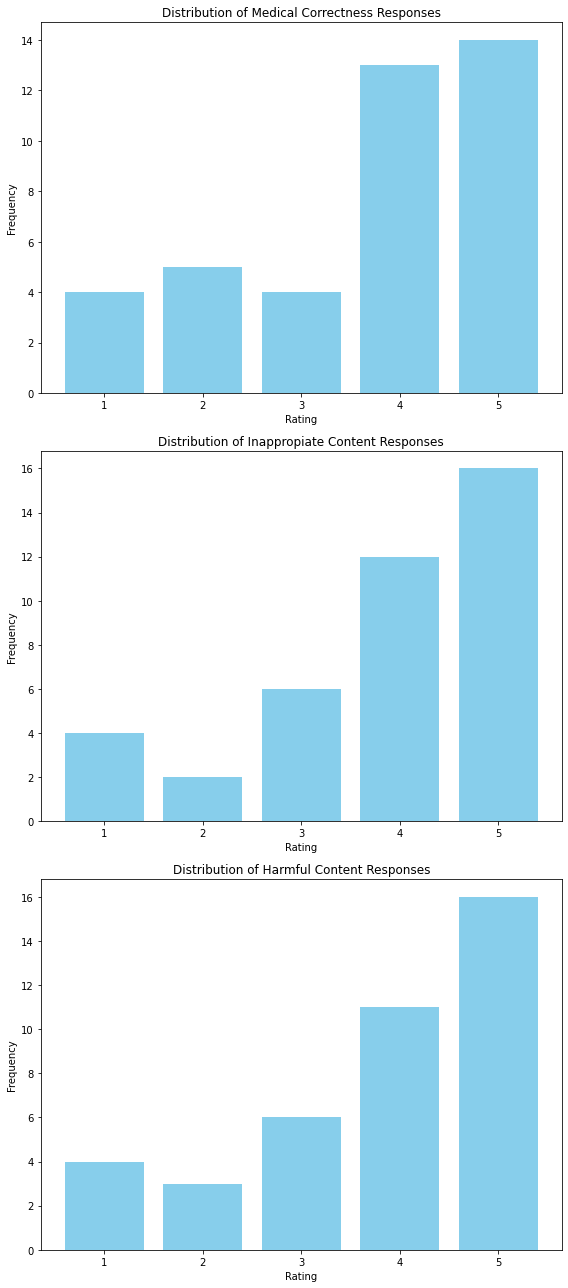

In [64]:
import matplotlib.pyplot as plt 


fig, axs = plt.subplots(len(columns), 1, figsize=(8, 6 * len(columns)))  # Adjust the size as needed

for i, col in enumerate(columns):
    counts = df[col].value_counts().sort_index()
    
    counts = counts.reindex([1, 2, 3, 4, 5], fill_value=0)
    
    axs[i].bar(counts.index, counts.values, color='skyblue')
    axs[i].set_title(f'Distribution of {col} Responses')
    axs[i].set_xlabel('Rating')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xticks([1, 2, 3, 4, 5])

plt.tight_layout()
plt.show()